In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn .metrics
from sklearn.linear_model import LogisticRegression

In [2]:
movies = pd.read_csv('movies.csv', sep='::', engine='python', encoding='latin1')


In [3]:
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
ratings = pd.read_csv('ratings.csv')

In [5]:
ratings.head()

,1::1193::5::978300760
0,1::661::3::978302109
1,1::914::3::978301968
2,1::3408::4::978300275
3,1::2355::5::978824291
4,1::1197::3::978302268


In [6]:
users = pd.read_csv('users.csv')

In [7]:
users.head()

,1::F::1::10::48067
0,2::M::56::16::70072
1,3::M::25::15::55117
2,4::M::45::7::02460
3,5::M::25::20::55455
4,6::F::50::9::55117


In [8]:
df = pd.concat([movies,ratings,users], axis=1)
df.head()

,MovieID,Title,Genres,1::1193::5::978300760,1::F::1::10::48067
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1::661::3::978302109,2::M::56::16::70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1::914::3::978301968,3::M::25::15::55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1::3408::4::978300275,4::M::45::7::02460
3,5.0,Father of the Bride Part II (1995),Comedy,1::2355::5::978824291,5::M::25::20::55455
4,6.0,Heat (1995),Action|Crime|Thriller,1::1197::3::978302268,6::F::50::9::55117


In [9]:
ratings = pd.read_csv('ratings.csv',sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [10]:
users = pd.read_csv('users.csv',sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)


users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [11]:
ratings_user = pd.merge(ratings, users, on=['UserID'])
ratings_movie = pd.merge(ratings, movies, on=['MovieID'])
master_data = pd.merge(ratings_user, ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]
master_data.head()
master_data.to_csv('moviee_data.csv', index=False)


In [12]:
moviee_data = pd.read_csv('moviee_data.csv')

In [13]:
moviee_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4


In [14]:
moviee_data.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [15]:
# data is clean

# Data analysis and visualization

In [16]:

moviee_data['Gender'].value_counts()

Gender
M    752283
F    245797
Name: count, dtype: int64

In [17]:

moviee_data['Occupation'].value_counts()

Occupation
4     130735
0     130229
7     105224
1      85194
17     72648
20     60289
12     57074
2      49982
14     49002
16     45944
6      37129
3      31556
10     23144
15     22896
5      21811
11     20528
19     14879
13     13737
18     12065
9      11310
8       2704
Name: count, dtype: int64

In [18]:

moviee_data['Rating'].value_counts()

Rating
4    348109
3    260844
5    225473
2    107496
1     56158
Name: count, dtype: int64

In [19]:
moviee_data['Age'].value_counts()

Age
25    394766
35    198580
18    183088
45     83490
50     72382
56     38727
1      27047
Name: count, dtype: int64

In [22]:
moviee_data['Title'].value_counts()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2990
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Blood and Sand (Sangre y Arena) (1989)                      1
Ring, The (1927)                                            1
Eden (1997)                                                 1
Frank and Ollie (1995)                                      1
Five Wives, Three Secretaries and Me (1998)                 1
Name: count, Length: 3705, dtype: int64

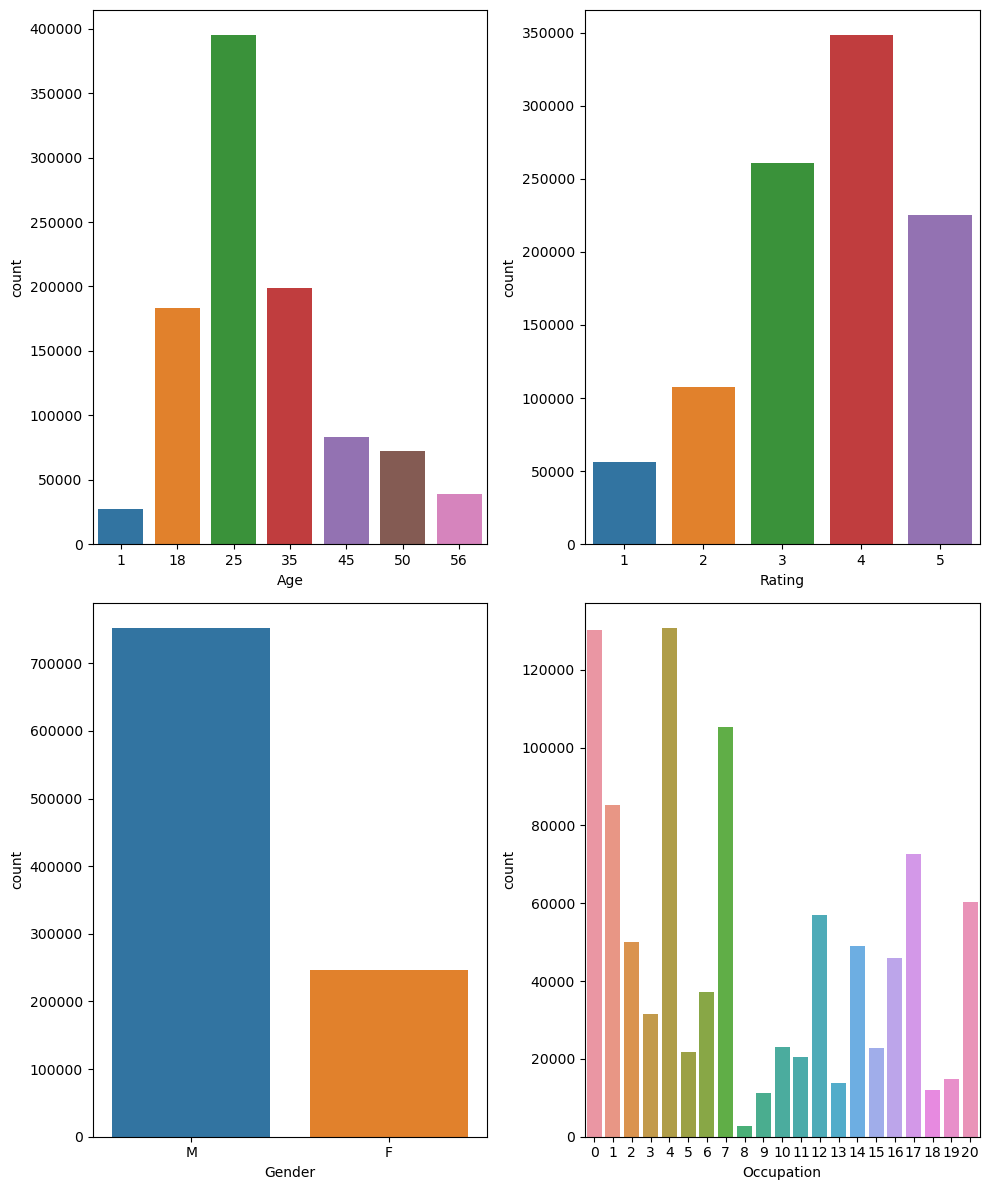

In [20]:

plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
sns.countplot(x=moviee_data['Age'])
plt.subplot(2, 2, 2)
sns.countplot(x=moviee_data['Rating'])
plt.subplot(2, 2, 3)
sns.countplot(x=moviee_data['Gender'])
plt.subplot(2, 2, 4)
sns.countplot(x=moviee_data['Occupation'])
plt.tight_layout()
plt.show()


# Data encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
labelencoder= LabelEncoder()

In [25]:
moviee_data['Gender']=labelencoder.fit_transform(moviee_data['Gender'])

In [26]:
moviee_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,1,16,5
1,3068,"Verdict, The (1982)",2,56,1,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,1,16,4
3,647,Courage Under Fire (1996),2,56,1,16,3
4,2194,"Untouchables, The (1987)",2,56,1,16,4


In [ ]:
x = moviee_data.drop(['Title','Rating','UserID'], axis = 1)     #Age', 'Gender', 'Occupation', 'MovieID'
y = moviee_data['Rating']

In [ ]:
print(x)

In [ ]:
print(y)

# SPLITTNG DATA TO TRAINING AND TESTING¶

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

# Model training using logistic regression

In [ ]:
mr= LogisticRegression()

In [ ]:
mr.fit(x_train, y_train)

In [ ]:
y_pred = mr.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions=mr.predict(x_test)

In [ ]:
classification_report(y_test,predictions)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

# using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)


In [ ]:
dt.predict(x_test)

In [ ]:
dt_pred = dt.predict(x_test)

In [ ]:


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, dt_pred)

# Print the accuracy
print("Decision Tree Accuracy on Test Set:", round(accuracy * 100, 2), "%")

# using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

# using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy on Test Set:", round(accuracy * 100, 2), "%")

# using SVM

In [85]:
from sklearn import svm

In [ ]:
svm_classifier = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the SVM model on the training data
svm_classifier.fit(x_train, y_train)

# Predict using the test set
svm_pred = svm_classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracy
print("SVM Accuracy on Test Set:", round(accuracy * 100, 2), "%")